# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
%cd yolov5

/home/navdeep/Desktop/YOLO-Drowsiness-Detection/yolov5


In [4]:
!ls

CONTRIBUTING.md  export.py   __pycache__       setup.cfg       val.py
data		 hubconf.py  README.md	       train.py        yolov5s.pt
dataset.yml	 LICENSE     requirements.txt  tutorial.ipynb
detect.py	 models      runs	       utils


In [5]:
!pip install -r requirements.txt

In [6]:
%cd ..

/home/navdeep/Desktop/YOLO-Drowsiness-Detection


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/navdeep/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-23 Python-3.8.10 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 3903MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [10]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 1161.5ms pre-process, 24.1ms inference, 14.2ms NMS per image at shape (1, 3, 448, 640)


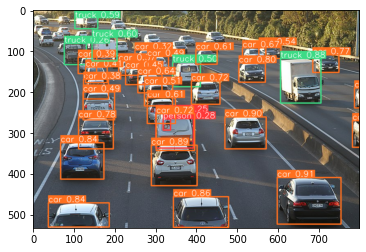

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [37]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [17]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.92010128-da20-11ec-8dfe-75a661630078.jpg


In [17]:
cv2.imread('data/images/awake.9f26200e-da11-11ec-b110-f99e0d931cfe.jpg')

array([[[164, 158, 147],
        [162, 158, 147],
        [160, 158, 147],
        ...,
        [207, 207, 189],
        [207, 207, 189],
        [207, 207, 189]],

       [[162, 158, 147],
        [160, 158, 147],
        [159, 159, 147],
        ...,
        [208, 208, 190],
        [207, 207, 189],
        [205, 205, 187]],

       [[159, 159, 147],
        [157, 159, 147],
        [155, 159, 147],
        ...,
        [208, 208, 190],
        [207, 207, 189],
        [205, 205, 187]],

       ...,

       [[132, 105,  41],
        [131, 106,  44],
        [130, 106,  46],
        ...,
        [ 63,  63,  69],
        [ 68,  66,  72],
        [ 71,  69,  75]],

       [[131, 104,  40],
        [130, 105,  43],
        [129, 105,  45],
        ...,
        [ 70,  62,  69],
        [ 73,  65,  72],
        [ 77,  70,  75]],

       [[131, 104,  40],
        [130, 105,  43],
        [129, 105,  45],
        ...,
        [ 70,  59,  67],
        [ 74,  62,  68],
        [ 78,  66,  72]]

In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.92010129-da20-11ec-8dfe-75a661630078.jpg
data/images/awake.9201012a-da20-11ec-8dfe-75a661630078.jpg
data/images/awake.9201012b-da20-11ec-8dfe-75a661630078.jpg
data/images/awake.9201012c-da20-11ec-8dfe-75a661630078.jpg
data/images/awake.9201012d-da20-11ec-8dfe-75a661630078.jpg
data/images/drowsy.9201012e-da20-11ec-8dfe-75a661630078.jpg
data/images/drowsy.9201012f-da20-11ec-8dfe-75a661630078.jpg
data/images/drowsy.92010130-da20-11ec-8dfe-75a661630078.jpg
data/images/drowsy.92010131-da20-11ec-8dfe-75a661630078.jpg
data/images/drowsy.92010132-da20-11ec-8dfe-75a661630078.jpg


In [19]:
%pwd

'/home/navdeep/Desktop/YOLO-Drowsiness-Detection'

In [20]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [21]:
%cd labelImg

/home/navdeep/Desktop/YOLO-Drowsiness-Detection/labelImg


In [22]:
!sudo apt-get install pyqt5-dev-tools
!sudo pip3 install -r requirements/requirements-linux-python3.txt
!make qt5py3
#!python3 labelImg.py

SyntaxError: invalid syntax (3562299931.py, line 1)

In [25]:
#!pip install pyqt5 lxml --upgrade

Requirement already up-to-date: pyqt5 in /home/navdeep/.local/lib/python3.8/site-packages (5.15.6)
Requirement already up-to-date: lxml in /home/navdeep/.local/lib/python3.8/site-packages (4.8.0)


In [27]:
#!pyrcc5 -o libs/resources.py resources.qrc

In [11]:
%cd ..

/home/navdeep/Desktop/YOLO-Drowsiness-Detection/yolov5


In [40]:
%cd yolov5 

/home/navdeep/Desktop/YOLO-Drowsiness-Detection/yolov5


In [10]:
!pwd

/home/navdeep/Desktop/YOLO-Drowsiness-Detection/yolov5


In [ ]:
!python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-211-gcee5959 Python-3.8.10 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 3903MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

In [11]:
%cd ..

/home/navdeep/Desktop/YOLO-Drowsiness-Detection


# 6. Load Custom Model

In [13]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/navdeep/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-5-23 Python-3.8.10 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 3903MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [14]:
img = os.path.join('data', 'images', 'awake.9f26200e-da11-11ec-b110-f99e0d931cfe.jpg')

In [15]:
results = model(img)

In [16]:
results.print()

image 1/1: 480x640 1 awake
Speed: 15.9ms pre-process, 20.7ms inference, 6.3ms NMS per image at shape (1, 3, 480, 640)


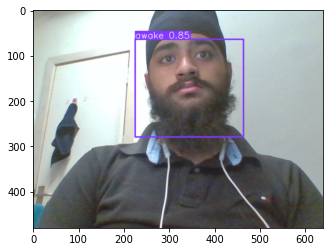

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()